In [2]:
import matplotlib.pyplot as plt
import pymongo
from sshtunnel import SSHTunnelForwarder
import numpy as np

/home/miguel/.local/share/virtualenvs/scalable-simulations-8cB5xf1K/lib/python3.8/site-packages/paramiko/transport.py:236: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [3]:
MONGO_HOST = 'TUD-tm2'
MONGO_DB = 'scalable-simulations'
PKEY = '~/.ssh/id_rsa'
print("Trying to connect to mongoDB '{}'".format(MONGO_DB))
server = SSHTunnelForwarder(
    MONGO_HOST,
    ssh_pkey=PKEY,
    remote_bind_address=('127.0.0.1', 27017)
    )
server.start()
client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client[MONGO_DB]


Trying to connect to mongoDB 'scalable-simulations'


In [4]:
global_means = []
global_stds = []
local_means = []
local_stds = []
fixed_means = []
fixed_stds = []

# NODE 12

global_values = []
global_ids = [4058, 4059, 4060, 4061, 4062]
for id in global_ids:
    global_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
global_means.append(np.mean(global_values, axis=0))
global_stds.append(np.std(global_values, axis=0)/np.sqrt(len(global_values)))

local_values = []
local_ids = [4069, 4070, 4071, 4072, 4073]#[4078, 4077, 4076, 4075, 4074] #
for id in local_ids:
    local_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
local_means.append(np.mean(local_values, axis=0))
local_stds.append(np.std(local_values, axis=0)/np.sqrt(len(local_values)))


fixed_values = []
# fixed_ids = [4064, 4065, 4066, 4067, 4068]
# fixed_ids = [4856, 4855, 4854, 4853, 4852]
fixed_ids = [4798, 4797, 4796, 4795, 4794]
for id in fixed_ids:
    fixed_values.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
fixed_means.append(np.mean(fixed_values, axis=0))
fixed_stds.append(np.std(fixed_values, axis=0)/np.sqrt(len(fixed_values)))


# fixed_values2 = []
# fixed_ids2 = [467, 468, 469]
# for id in fixed_ids2:
#     fixed_values2.append(db.get_collection("metrics").find_one({'run_id': id, 'name': 'mean episodic return'})['values'])
# fixed_mean2 = np.mean(fixed_values2, axis=0)
# fixed_std2 = np.std(fixed_values2, axis=0)/np.sqrt(len(fixed_values2))

agent_training_time_GS = 13.1
agent_training_time_IALS = 3.9
AIP_training_time = 207.17/3600
data_collection_time = 111.89/3600

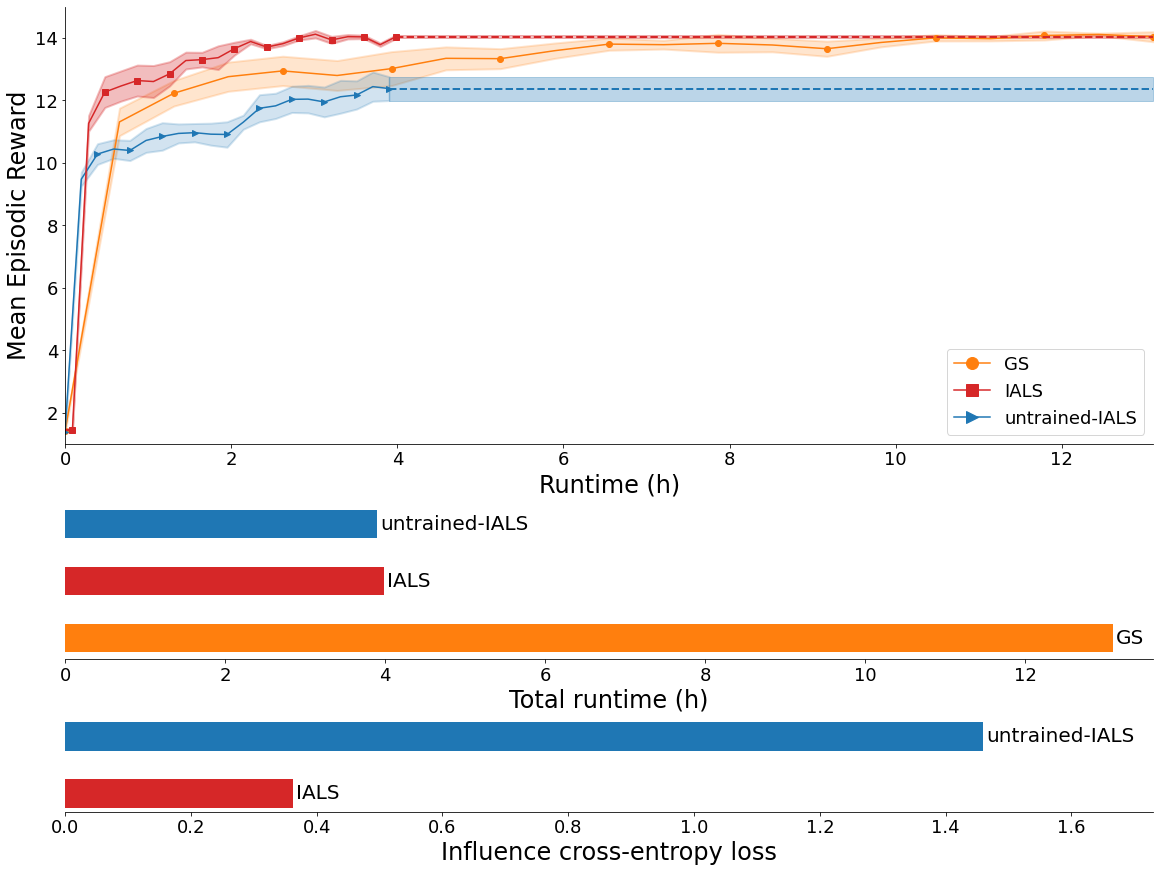

In [5]:
# plt.figure(figsize=(18, 18))
fig, ax = plt.subplots(3,1, figsize=(16,12), gridspec_kw={'height_ratios': [1.4, 0.5, 0.3]}, constrained_layout = True)
# plt.subplots_adjust(left=0.05, bottom=0.05, right=None, top=0.94, wspace=None, hspace=0.3)

# ax = np.append(ax, plt.axes([.39, .5, .5, .3]))

for i in [0]:#, 3]:

    local_mean = local_means[0]
    local_std = local_stds[0]
    global_mean = global_means[0]
    global_std = global_stds[0]
    fixed_mean = fixed_means[0]
    fixed_std = fixed_stds[0]
    
    # GLOBAL
    times = np.linspace(0, agent_training_time_GS, 21)
    ax[i].plot(times, global_mean, color='C1', label='GS', marker='o', markevery=2)
    ax[i].fill_between(times, global_mean-global_std, global_mean+global_std, alpha=0.2, color='C1', linewidth=2)

    # FIXED
    # times = np.linspace(0, 3.33, 21)
    times = local_times = np.linspace(0, agent_training_time_IALS, 21)
    ax[i].plot(times, fixed_mean, color='C0', label='untrained-IALS', marker='>', markevery=2)
    ax[i].fill_between(times, fixed_mean-fixed_std, fixed_mean+fixed_std, alpha=0.2, color='C0', linewidth=2)

    # times = np.linspace(3.33, 13.1, 2)
    times = np.linspace(agent_training_time_IALS, agent_training_time_GS, 2)
    values = np.array([np.mean(fixed_mean[-1:]), np.mean(fixed_mean[-1:])])
    std = np.array([np.mean(fixed_std[-1:]), np.mean(fixed_std[-1:])])
    ax[i].plot(times, values, color='C0', linestyle='dashed', linewidth=2)
    ax[i].fill_between(times, values-std, values+std, alpha=0.3, color='C0')



    # LOCAL
    times = np.linspace(0, AIP_training_time + data_collection_time, 2)
    values = np.array([np.mean(local_mean[0]), np.mean(local_mean[0])])
    std = np.array([np.mean(local_std[0]), np.mean(local_std[0])])
    ax[i].plot(times, values, color='C3', linestyle='dashed', linewidth=2)
    ax[i].fill_between(times, values-std, values+std, alpha=0.3, color='C3')

    local_times = np.linspace(AIP_training_time + data_collection_time, agent_training_time_IALS + AIP_training_time + data_collection_time, 21)
    ax[i].plot(local_times, local_mean, color='C3', label='IALS', marker='s', markevery=2)
    ax[i].fill_between(local_times, local_mean-local_std, local_mean+local_std, alpha=0.3, color='C3', linewidth=2)

    times = np.linspace(agent_training_time_IALS + AIP_training_time + data_collection_time, agent_training_time_GS, 2)
    values = np.array([np.mean(local_mean[-1:]), np.mean(local_mean[-1:])])
    std = np.array([np.mean(local_std[-1:]), np.mean(local_std[-1:])])
    ax[i].plot(times, values, color='C3', linestyle='dashed', linewidth=2)
    ax[i].fill_between(times, values-std, values+std, alpha=0.3, color='C3')
    ax[0].set_xlabel('Runtime (h)', fontsize=24)
    ax[0].set_ylabel('Mean Episodic Reward', fontsize=24)
    ax[0].tick_params(labelsize=18)

    if i == 3:
        ax[i].set_xlim(1, 13.1)
        ax[i].set_ylim(12.5,14.5)
    else:
        ax[i].set_xlim(0, 13.1)
        ax[i].set_ylim(1,14.5)        
        # ax[i].axes.get_xaxis().set_visible(False)
        ax[i].spines['right'].set_visible(False)
        ax[i].spines['top'].set_visible(False)


# fig.text(0, 0.75, 'Mean Episodic Reward', va='center', rotation='vertical', fontsize=18)
# RUNTIMES BAR PLOT
# barh = ax[1].barh([0,1,2],[12.9, 3.9, 3.33], height=0.5, color=['C1', 'C3', 'C0'])
barh = ax[1].barh([0,1,2],[agent_training_time_GS, data_collection_time + AIP_training_time + agent_training_time_IALS, agent_training_time_IALS], height=0.5, color=['C1', 'C3', 'C0'])
ax[1].set_xlabel('Total runtime (h)', fontsize=24)
ax[1].axes.get_yaxis().set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].set_xlim(0, 13.6)
# ax[1].bar_label(barh, labels=['GS', 'IALS', 'F-IALS'], fontsize=18, padding=3)
ax[1].bar_label(barh, labels=['GS', 'IALS', 'untrained-IALS'], fontsize=20, padding=3)
# ax[1].set_frame_on(False)
ax[1].tick_params(labelsize=18)

# CROSSENTROPY LOSS
# barh = ax[2].barh([0,1],[0.3619, 0.5188], height=0.5, color=['C3', 'C0', 'C2'])
barh = ax[2].barh([0,1],[0.3619, 1.46], height=0.5, color=['C3', 'C0', 'C2'])
ax[2].set_xlabel('Influence cross-entropy loss', fontsize=24)
ax[2].axes.get_yaxis().set_visible(False)
ax[2].spines['right'].set_visible(False)
ax[2].spines['top'].set_visible(False)
ax[2].spines['left'].set_visible(False)
ax[2].set_xlim(0, 1.73)
ax[2].bar_label(barh, labels=['IALS', 'untrained-IALS'], fontsize=20, padding=3)
ax[2].tick_params(labelsize=18)

pos = [0,2,1]
handles, labels = ax[0].get_legend_handles_labels()
handles = np.array(handles)[pos]
labels = np.array(labels)[pos]
ax[0].legend(handles, labels, loc=4, ncol=1, fontsize=18, markerscale=2) #bbox_to_anchor = [0.65, 1]
ax[0].set_ylim(1,15)
plt.savefig('warehouse_plot.pdf')



In [1]:
import numpy as np
targets = np.genfromtxt('../influence/data/warehouse/4063/targets.csv', delimiter=',')

In [2]:
np.shape(targets)

(10400, 16)

In [3]:
np.sum(targets, axis=0)/np.shape(targets)[0]

array([0.04067308, 0.03846154, 0.03721154, 0.88365385, 0.03942308,
       0.03798077, 0.03634615, 0.88625   , 0.03365385, 0.04480769,
       0.03721154, 0.88432692, 0.03384615, 0.04336538, 0.03634615,
       0.88644231])